In [1]:
from sklearn.cluster import KMeans
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data1=pd.read_excel('Base_Dimensionamento_C1_decong..xlsx', sheet_name='Sheet1')

In [3]:
def op_point_mov_average(f,b,bw): 
        
        Layer=data1[data1['Fornecedor'].isin([f])&data1['BW'].isin([bw])&data1['Banda'].isin([b])]
        Layer=Layer.reset_index(drop=True)
        w=int((Layer.count()[0])/100)
        Mov_avg_input= Layer[['User Thp','Utilization']]
        Mov_avg_input=Mov_avg_input.sort_values(by=['Utilization'])
        Mov_avg_output=Mov_avg_input.rolling(window=w).mean().dropna()
        Mov_avg_output[['Fornecedor','Banda','BW']]=Layer[['Fornecedor','Banda','BW']]
        return Mov_avg_output

In [4]:
a=op_point_mov_average("ERICSSON","L1800",20)

In [5]:
a.head()

,User Thp,Utilization,Fornecedor,Banda,BW
1809,33712.051901,0.010241,ERICSSON,L1800,20
1808,34532.230221,0.011110,ERICSSON,L1800,20
1807,34411.973811,0.011831,ERICSSON,L1800,20
1806,36147.018089,0.012505,ERICSSON,L1800,20
1805,36766.794814,0.013157,ERICSSON,L1800,20


In [6]:
f='ERI'
r='L1800'
s=20

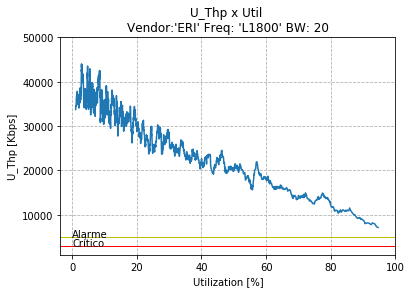

In [7]:
plt.plot(a['Utilization']*100,a['User Thp'])
plt.title(f"U_Thp x Util \nVendor:{f!r} Freq: {r!r} BW: {s!r}")
plt.axhline(linewidth=1, color='y',y=5000)
plt.axhline(linewidth=1, color='r',y=3000)
plt.grid(linestyle='--')
plt.xlim(right=100)
plt.ylim(top=50000)
plt.text(0,3000,"Crítico")
plt.text(0,5000,"Alarme")
plt.autoscale(enable=False)
plt.xlabel('Utilization [%]')
plt.ylabel("U_Thp [Kbps]")
plt.savefig('U_Thp x Util_{}'.format(f+"_"+r+"_"+str(s)).format(s))

In [8]:
x=0
f_ser=Series(data1.Fornecedor.unique())
bw_ser=Series(data1.BW.unique())
b_ser=Series(data1.Banda.unique())
for i in f_ser.index:
    f=f_ser[i]
    for j in b_ser.index:
        b=b_ser[j]
        for k in bw_ser.index:
            bw=bw_ser[k]
            Layer=data1[data1['Fornecedor'].isin([f])&data1['BW'].isin([bw])&data1['Banda'].isin([b])]
            if Layer.count()[1]>0:
                a=op_point_mov_average(f,b,bw)
                a.to_csv('file_{}.csv'.format(x))
                x=x+1
files=[]
for i in range(x):
    files.append('file_{}.csv'.format(i))
result = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)
result.to_excel('OP_Points.xlsx',sheet_name='Sheet1',startrow=0)

In [9]:
result_5M=result[np.logical_and(result['User Thp']>4500,result['User Thp']<5500)]

In [10]:
result_3M=result[np.logical_and(result['User Thp']>2700,result['User Thp']<3300)]

In [11]:
result.to_excel('OP_Points.xlsx',sheet_name='Sheet1',startrow=0)

In [12]:
pivot_5m=result_5M.pivot_table(columns=['Fornecedor'],index=['Banda','BW'],values=['Utilization'])

In [13]:
pivot_3m=result_3M.pivot_table(columns=['Fornecedor'],index=['Banda','BW'],values=['Utilization'])

In [14]:
result.to_excel('OP_Points.xlsx',sheet_name='Sheet1',startrow=0)
pivot_3m.to_excel('OP_Points_3m.xlsx',sheet_name='Sheet1',startrow=0)
pivot_5m.to_excel('OP_Points_5m.xlsx',sheet_name='Sheet1',startrow=0)

In [15]:
 Layer=data1[data1['Fornecedor'].isin(['ERICSSON'])&data1['BW'].isin([20])&data1['Banda'].isin(['L1800'])]

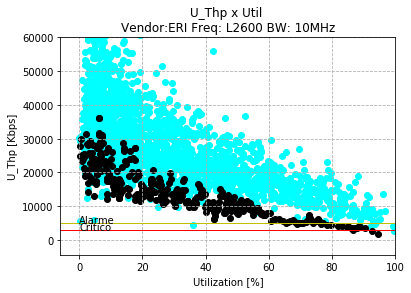

In [16]:
plt.scatter(Layer['Utilization']*100,Layer['User Thp'],color='cyan')
plt.scatter(a['Utilization']*100,a['User Thp'],color='black')
plt.title("U_Thp x Util \nVendor:ERI Freq: L2600 BW: 10MHz")
plt.axhline(linewidth=1, color='y',y=5000)
plt.axhline(linewidth=1, color='r',y=3000)
plt.grid(linestyle='--')
plt.xlabel('Utilization [%]')
plt.ylabel("U_Thp [Kbps]")
plt.xlim(right=100)
plt.ylim(top=60000)
plt.text(0,3000,"Crítico")
plt.text(0,5000,"Alarme")
plt.autoscale(enable=False)
plt.savefig('eri_2600_10_total')

In [17]:
samples_5M=data1[np.logical_and(data1['User Thp']>4500,data1['User Thp']<5500)]

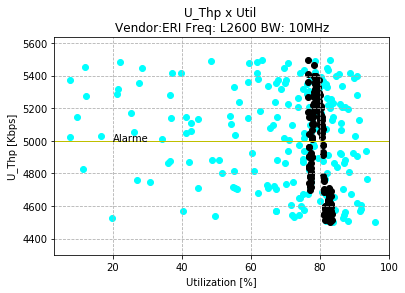

In [18]:
z=result_5M[result_5M['Fornecedor'].isin(['ERICSSON'])&result_5M['BW'].isin([10])&result_5M['Banda'].isin(['L2600'])]
s=samples_5M[samples_5M['Fornecedor'].isin(['ERICSSON'])&samples_5M['BW'].isin([10])&samples_5M['Banda'].isin(['L2600'])]
plt.scatter(s['Utilization']*100,s['User Thp'],color='cyan')
plt.scatter(z['Utilization']*100,z['User Thp'],color='black')
plt.title("U_Thp x Util \nVendor:ERI Freq: L2600 BW: 10MHz")
plt.axhline(linewidth=1, color='y',y=5000)
plt.axhline(linewidth=1, color='r',y=3000)
plt.grid(linestyle='--')
plt.xlabel('Utilization [%]')
plt.ylabel("U_Thp [Kbps]")
plt.xlim(right=100)
plt.ylim(bottom=4300)
#plt.text(20,3000,"Crítico")
plt.text(20,5000,"Alarme")
plt.autoscale(enable=False)
plt.savefig('eri_2600_10_5M')

In [19]:
samples_3M=data1[np.logical_and(data1['User Thp']>2700,data1['User Thp']<3300)]

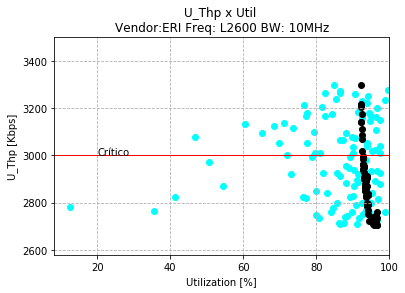

In [20]:
w=result_3M[result_3M['Fornecedor'].isin(['ERICSSON'])&result_3M['BW'].isin([10])&result_3M['Banda'].isin(['L2600'])]
t=samples_3M[samples_3M['Fornecedor'].isin(['ERICSSON'])&samples_3M['BW'].isin([10])&samples_3M['Banda'].isin(['L2600'])]
plt.scatter(t['Utilization']*100,t['User Thp'],color='cyan')
plt.scatter(w['Utilization']*100,w['User Thp'],color='black')
plt.title("U_Thp x Util \nVendor:ERI Freq: L2600 BW: 10MHz")
plt.axhline(linewidth=1, color='y',y=5000)
plt.axhline(linewidth=1, color='r',y=3000)
plt.grid(linestyle='--')
plt.xlabel('Utilization [%]')
plt.ylabel("U_Thp [Kbps]")
plt.xlim(right=100)
plt.ylim(top=3500)
plt.text(20,3000,"Crítico")
#plt.text(20,5000,"Alarme")
plt.autoscale(enable=False)
plt.savefig('eri_2600_10_3M')

In [1]:
from sklearn.cluster import KMeans
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

#Busca o arquivo com as medições de KPIs de Dia Médio
os.chdir("C:/Users/f8026379/Documents/MANP/Operating_Point")
data1=pd.read_excel('Base_Dimensionamento_C1_decong..xlsx', sheet_name='Sheet1')

#Calcula medias moveis e gera gráfficos
os.chdir("C:/Users/f8026379/Documents/MANP/Operating_Point/Graphics")
data2=data1[['Fornecedor','Banda','BW','User Thp','Utilization']]
result=DataFrame(columns=[['Fornecedor','Banda','BW','User Thp','Utilization']])
for (f,b,bw) , group in data2.groupby(['Fornecedor','Banda','BW']):
    test=group
    test=test.reset_index(drop=True)
    if test.count()[0] >100:
        w=int((test.count()[0])/100)
    else:
        w=2
    Mov_avg_input= test[['User Thp','Utilization']]
    Mov_avg_input=Mov_avg_input.sort_values(by=['Utilization'])
    Mov_avg_output=Mov_avg_input.rolling(window=w).mean().dropna()
    Mov_avg_output[['Fornecedor','Banda','BW']]=test[['Fornecedor','Banda','BW']]
    result=pd.concat([result,Mov_avg_output],sort=False)
    plt.close()
    plt.scatter(test['Utilization']*100,test['User Thp'],color='cyan')
    plt.plot(Mov_avg_output['Utilization']*100,Mov_avg_output['User Thp'],color='black')
    plt.title(f"U_Thp x Util \nVendor: {f!r} Layer: {b!r} BW: {bw!r} MHz")
    plt.axhline(linewidth=1, color='y',y=5000)
    plt.axhline(linewidth=1, color='r',y=3000)
    plt.grid(linestyle='--')
    plt.xlabel('Utilization [%]')
    plt.ylabel("U_Thp [Kbps]")
    plt.xlim(left=0)
    plt.xlim(right=100)
    plt.ylim(top=20000)
    plt.ylim(bottom=0)
    plt.text(20,3000,"Crítico")
    plt.text(20,5000,"Alarme")
    #plt.autoscale(enable=True)
    plt.savefig('U_Thp_x_Util_{}'.format(f+"_"+b+"_"+str(bw)+" MHz").format(bw))


#Geração dos Reports
os.chdir("C:/Users/f8026379/Documents/MANP/Operating_Point/Reports")
result_5M=result[np.logical_and(result['User Thp']>4500,result['User Thp']<5500)]
result_3M=result[np.logical_and(result['User Thp']>2700,result['User Thp']<3300)]
Samples=result.pivot_table(columns=['Fornecedor'],index=['Banda','BW'],values=['Unnamed: 0'],aggfunc='count')
pivot_5m=result_5M.pivot_table(columns=['Fornecedor'],index=['Banda','BW'],values=['Utilization'])
pivot_3m=result_3M.pivot_table(columns=['Fornecedor'],index=['Banda','BW'],values=['Utilization'])
# Specify a writer
writer = pd.ExcelWriter('Report.xlsx', engine='xlsxwriter')
# Write your DataFrame to a file     
result.to_excel(writer, 'Mov_average_total')
Samples.to_excel(writer, 'Mov_average_total',startcol=10)
pivot_3m.to_excel(writer, 'Op_points_3Mbps')
pivot_5m.to_excel(writer, 'Op_points_5Mbps')
result_3M.to_excel(writer, 'Samples_3Mbps')
result_5M.to_excel(writer, 'Samples_5Mbps')
# Save the result 
writer.save()

AttributeError: 'NoneType' object has no attribute 'is_extension'

In [178]:
result

,Fornecedor,Banda,BW,User Thp,Utilization
